In [11]:
import numpy as np
import pandas as pd
df = pd.read_csv('SMSSpamCollection.csv')

In [12]:
df.head()

,"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham\tOk lar... Joking wif u oni...
1,spam\tFree entry in 2 a wkly comp to win FA Cu...
2,ham\tU dun say so early hor... U c already the...
3,"ham\tNah I don't think he goes to usf, he live..."
4,spam\tFreeMsg Hey there darling it's been 3 we...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 1 columns):
 #   Column                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                               --------------  ----- 
 0   ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  5573 non-null   object
dtypes: object(1)
memory usage: 43.7+ KB


In [14]:
df.sample(5)

,"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1377,spam\tDouble Mins & Double Txt & 1/2 price Lin...
24,ham\tJust forced myself to eat a slice. I'm re...
97,ham\tHi. Wk been ok - on hols now! Yes on for ...
1112,ham\tSo that means you still think of teju
3709,ham\tOk.ok ok..then..whats ur todays plan


In [15]:
df.shape

(5573, 1)

In [16]:
#1. Data Cleaning
#2. EDA - Exploratory Data Analysis
#3. Text Preprocessing
#4. Model Building
#5. Evaluation
#6. Improvemnts
#7. Website
#8. Deploy(heroku)

## 1. Data Cleaning

In [17]:
import numpy as np
import pandas as pd

df = pd.read_csv('SMSSpamCollection.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 1 columns):
 #   Column                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                               --------------  ----- 
 0   ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  5573 non-null   object
dtypes: object(1)
memory usage: 43.7+ KB


In [18]:
df.sample(5)

,"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
3842,"ham\tchile, please! It's only a &lt;DECIMAL&g..."
60,ham\tHa ha ha good joke. Girls are situation s...
4959,ham\tWhat i mean was i left too early to check...
1823,ham\tSame as u... Dun wan... Y u dun like me a...
3737,ham\tPlz note: if anyone calling from a mobile...


In [19]:
# drop last 3 cols
#df.drop(columns=['unnamed : 2','unnamed : 3','unnamed : 4' ],inplace = True)
df.sample(5)

,"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
3539,ham\tWhat happen dear. Why you silent. I am te...
721,ham\tS'fine. Anytime. All the best with it.
3424,spam\tAm new 2 club & dont fink we met yet Wil...
2241,ham\tU buy newspapers already?
3716,ham\tNetworking technical support associate.


In [20]:
# Display the list of column names to verify their correctness
print(df.columns)

# Drop the columns
cols_to_drop = ['unnamed : 2', 'unnamed : 3', 'unnamed : 4']

# Check if the columns to drop exist in the DataFrame
missing_cols = [col for col in cols_to_drop if col not in df.columns]
if missing_cols:
    print("Columns not found:", missing_cols)
else:
    df.drop(columns=cols_to_drop, inplace=True)
    print("Columns dropped successfully.")

# Display a sample of the DataFrame after dropping columns
print(df.sample(5))


Index(['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'], dtype='object')
Columns not found: ['unnamed : 2', 'unnamed : 3', 'unnamed : 4']
     ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
2113  ham\tYeah, don't go to bed, I'll be back befor...                                                                  
3746        ham\tI'm not. She lip synced with shangela.                                                                  
2465                ham\tS.i think he is waste for rr..                                                                  
4     spam\tFreeMsg Hey there darling it's been 3 we...                                                                  
3985      ham\tWhatever, juliana. Do whatever you want.                                                                  


In [21]:
#renaming the columns
import pandas as pd

# Load the dataset
df = pd.read_csv('SMSSpamCollection.csv', sep='\t', header=None, names=['Label', 'Message'])

# Splitting the integers and labels
df['target'] = df['Label'].str.split('\t').str[0]
df['text'] = df['Label'].str.split('\t').str[1]
df = df[['target', 'text']]

#df = df.reset_index(drop=True)
# Display the resulting dataframe
print(df)


     target                                               text
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5569   spam  This is the 2nd time we have tried 2 contact u...
5570    ham               Will ü b going to esplanade fr home?
5571    ham  Pity, * was in mood for that. So...any other s...
5572    ham  The guy did some bitching but I acted like i'd...
5573    ham                         Rofl. Its true to its name

[5574 rows x 2 columns]


In [22]:
df.sample(25)

,target,text
2002,ham,Idea will soon get converted to live:)
1596,ham,Pls confirm the time to collect the cheque.
5365,ham,"I think your mentor is , but not 100 percent s..."
4770,ham,watever reLation u built up in dis world only ...
3791,ham,I love you !!! You know? Can you feel it? Does...
166,ham,I place all ur points on e cultures module alr...
858,ham,Hai ana tomarrow am coming on morning. &lt;DE...
838,ham,"Sir, I have been late in paying rent for the p..."
1788,ham,Yes:)sura in sun tv.:)lol.
3499,ham,You said to me before i went back to bed that ...


In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [24]:
 encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [25]:
df['target'] = encoder.fit_transform(df['target'])
#0 is assigned to ham
#1 is assigned to spam

In [26]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
#checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [28]:
#check for duplicate values
df.duplicated().sum()

414

In [29]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [30]:
df.duplicated().sum()

0

In [31]:
df.shape

(5160, 2)

## 2. EDA : Exploratory Data Analysis

In [32]:
df['target'].value_counts()

0    4518
1     642
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x18952f72290>,
 [Text(-1.0170346463201791, 0.4190948916228736, 'ham'),
  Text(1.0170346267009303, -0.4190949392337011, 'spam')],
 [Text(-0.5547461707200977, 0.22859721361247648, '87.56'),
  Text(0.5547461600186891, -0.22859723958201877, '12.44')])

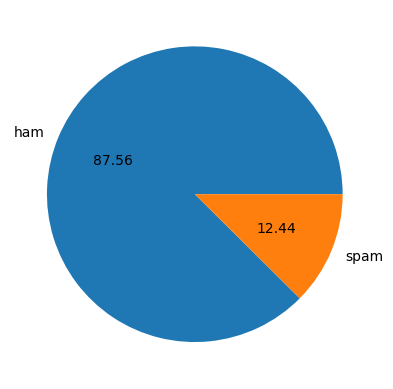

In [33]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")

In [43]:
#data is imbalanced


In [44]:
import nltk

In [71]:
!pip install nltk

In [68]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\happy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [72]:
df['num_characters'] = df['text'].apply(len)

In [73]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [74]:
#num of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [75]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [76]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head() 

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [77]:
df[['num_characters','num_words','num_sentences' ]].describe()

,num_characters,num_words,num_sentences
count,5160.000000,5160.000000,5160.000000
mean,79.141279,18.578876,1.951357
std,58.289387,13.390839,1.363466
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [78]:
df[df['target'] == 0]

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5567,0,Huh y lei...,12,4,1
5570,0,Will ü b going to esplanade fr home?,36,9,1
5571,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5572,0,The guy did some bitching but I acted like i'd...,125,27,1


In [79]:
#ham
df[df['target'] == 0][['num_characters', 'num_words','num_sentences' ]].describe()

,num_characters,num_words,num_sentences
count,4518.000000,4518.000000,4518.000000
mean,70.860779,17.279327,1.806109
std,56.584730,13.572536,1.281858
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [80]:
#spam
df[df['target'] == 1][['num_characters', 'num_words','num_sentences' ]].describe()

,num_characters,num_words,num_sentences
count,642.000000,642.000000,642.000000
mean,137.414330,27.724299,2.973520
std,29.975596,7.028380,1.479211
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


## Insights
### 1. The mean value of number of characters in spam is more the ham messages.
### 2. The mean value of number of words in spam is more the ham messages.
### 3. The mean value of number of sentences in spam is more the ham messages.

In [81]:
#to see the comparison plot the histogram
import seaborn as sns


Note : Red color for spam messages.


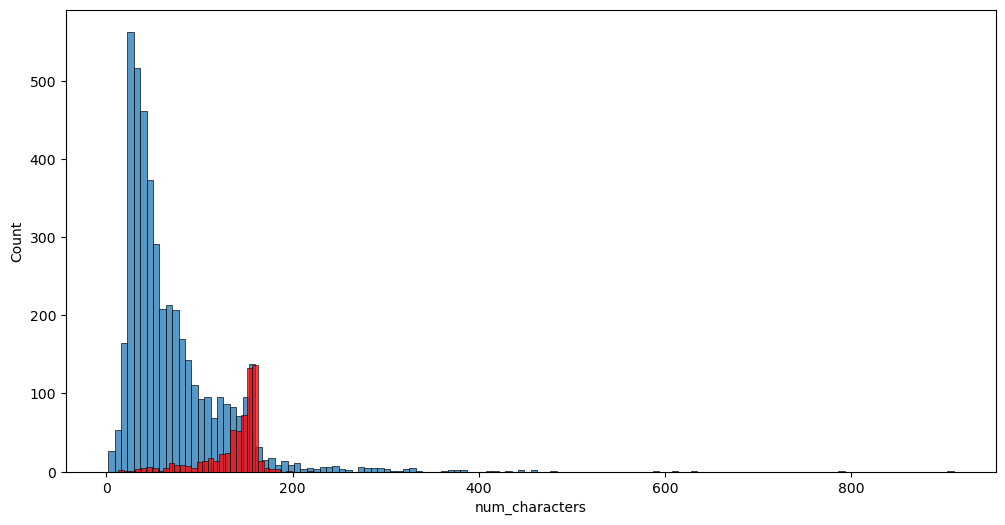

In [82]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
print("Note : Red color for spam messages.")

Note : Red color for spam messages.


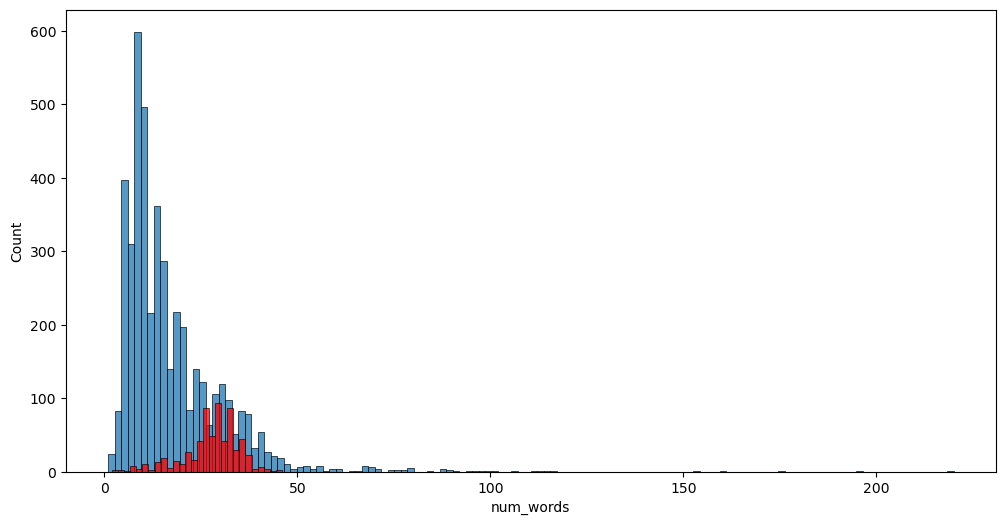

In [83]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')
print("Note : Red color for spam messages.")

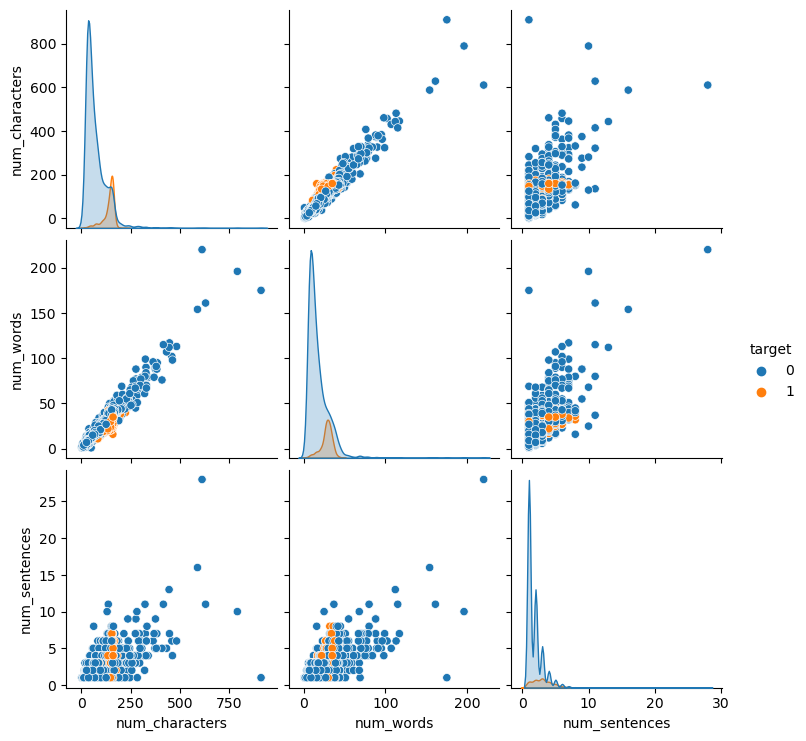

In [84]:
sns.pairplot(df, hue = 'target')

In [85]:
#Corelation Coefficient
df.corr()

C:\Users\happy\AppData\Local\Temp\ipykernel_18556\1939837678.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.376890,0.257473,0.282626
num_characters,0.376890,1.000000,0.966054,0.637305
num_words,0.257473,0.966054,1.000000,0.683835
num_sentences,0.282626,0.637305,0.683835,1.000000


C:\Users\happy\AppData\Local\Temp\ipykernel_18556\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

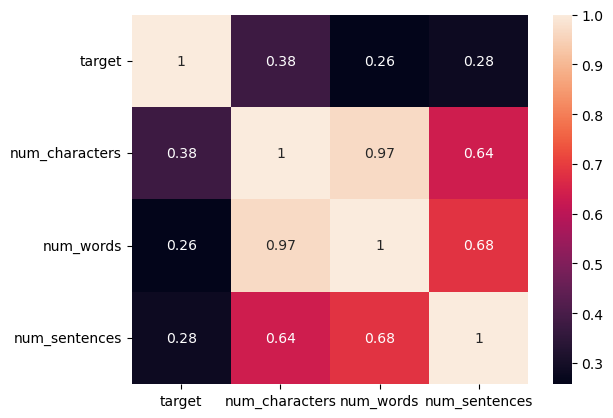

In [86]:
sns.heatmap(df.corr(), annot=True)

## 3. Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation 
* Stemming

In [87]:
#stop words --> that contribute in formation of sentence but doesn't provide meaning to sentence.
 #e.g : is, are etc.

In [88]:
# 1. Lower Case

def transform_text(text):
    text = text.lower()
    return text

In [89]:
transform_text('Hi how Are you')

'hi how are you'

In [90]:
# 2. Tokenization

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    return text

In [91]:
transform_text('Hi how Are you')

['hi', 'how', 'are', 'you']

In [92]:
# 3. Removing Special Characters

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text :
        if i.isalnum():
            y.append(i)
    return y

In [93]:
transform_text('Hi how Are you 20% eg')

['hi', 'how', 'are', 'you', '20', 'eg']

In [94]:
transform_text('Hi how Are you %% eg')

['hi', 'how', 'are', 'you', 'eg']

In [95]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\happy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [96]:
# 4. Removing stop words and punctuation 

from nltk.corpus import stopwords
stopwords.words('english')

 


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [97]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [143]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text :
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation :
            y.append(i)
            
    
    return y

In [99]:
transform_text('Hi how Are you Arpita?')

['hi', 'arpita']

In [100]:
transform_text('Did you like my presentation on ML?')

['like', 'presentation', 'ml']

In [101]:
df['text'][2000]

"LMAO where's your fish memory when I need it?"

In [102]:
# 5. Stemming

import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\happy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\happy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [103]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    ps = PorterStemmer()  # Initialize the Porter Stemmer
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))
            
    return " ".join(y)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\happy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\happy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [104]:
transform_text('I loved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [105]:
df['text'][1991]

'HI DARLIN IVE JUST GOT BACK AND I HAD A REALLY NICE NIGHT AND THANKS SO MUCH FOR THE LIFT SEE U TOMORROW XXX'

In [106]:
transform_text('HI DARLIN IVE JUST GOT BACK AND I HAD A REALLY NICE NIGHT AND THANKS SO MUCH FOR THE LIFT SEE U TOMORROW XXX')

'hi darlin ive got back realli nice night thank much lift see u tomorrow xxx'

In [110]:
#creating a neww column for transform_text
df['transformed_text'] = df['text'].apply(transform_text)

In [111]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [116]:
pip install matplotlib


In [117]:
pip install wordcloud

In [118]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white' )

In [119]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = " "))

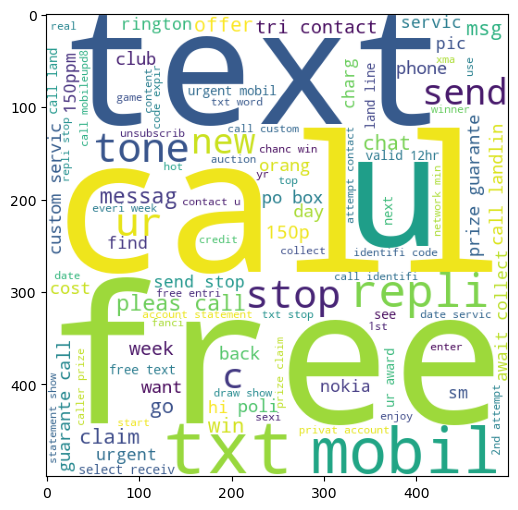

In [120]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

#the message appeared in this is usually found in spam messages

In [121]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep = " "))

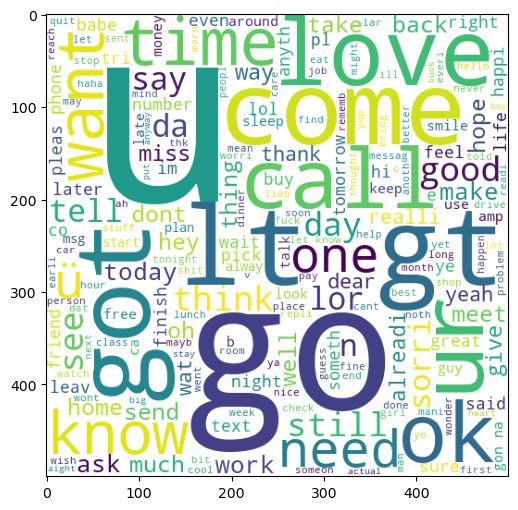

In [122]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [123]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [124]:
df[df['target']==1]['transformed_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5539    want explicit sex 30 sec ring 02073162414 cost...
5542    ask 3mobil 0870 chatlin inclu free min india c...
5549    contract mobil 11 mnth latest motorola nokia e...
5568    remind o2 get pound free call credit detail gr...
5569    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed_text, Length: 642, dtype: object

In [125]:
#converting the above result to list
df[df['target']==1]['transformed_text'].tolist()

#every message is a list of strings

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [126]:
#printing all the messages
for msg in df[df['target']==1]['transformed_text'].tolist():
    
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [127]:
#separating each words
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [128]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [129]:
#length
len(spam_corpus)

9808

In [130]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 186,
         'entri': 21,
         '2': 154,
         'wkli': 9,
         'comp': 8,
         'win': 46,
         'fa': 2,
         'cup': 3,
         'final': 13,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 30,
         'question': 9,
         'std': 6,
         'txt': 139,
         'rate': 26,
         'c': 43,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 19,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 7,
         'network': 26,
         'custom': 39,
         'select': 26,
         'receivea': 1,
         'prize': 79,
         'reward': 7,
         'claim': 97,
         'cal

In [131]:
#most common 30 spam words
Counter(spam_corpus).most_common(30)

[('call', 313),
 ('free', 186),
 ('2', 154),
 ('txt', 139),
 ('text', 122),
 ('ur', 119),
 ('u', 118),
 ('mobil', 110),
 ('stop', 108),
 ('repli', 103),
 ('claim', 97),
 ('4', 95),
 ('prize', 79),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('send', 60),
 ('tone', 59),
 ('urgent', 57),
 ('award', 55),
 ('nokia', 54),
 ('contact', 54),
 ('phone', 52),
 ('cash', 50),
 ('pleas', 50),
 ('week', 49),
 ('win', 46),
 ('min', 45),
 ('c', 43),
 ('guarante', 42)]

In [132]:
#adding 30 common words in dataframe
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,313
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,118
7,mobil,110
8,stop,108
9,repli,103


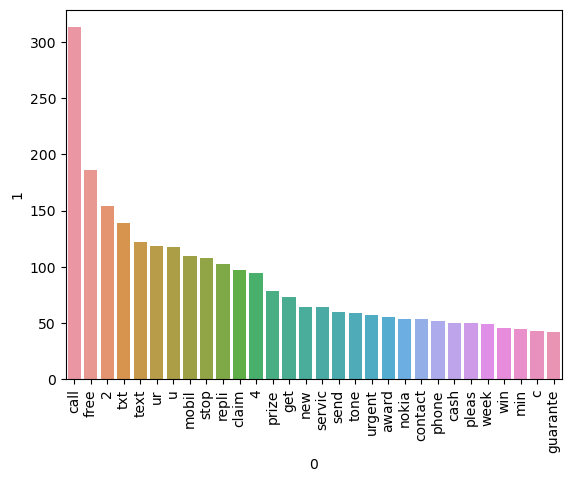

In [133]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#top 30 words which are used in spam messages

In [134]:
#Interpretablity is important in Machine Learning



In [135]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [136]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u',
 

In [137]:
len(ham_corpus)

35927

In [138]:
from collections import Counter
Counter(ham_corpus)

Counter({'go': 407,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 13,
         'bugi': 7,
         'n': 121,
         'great': 97,
         'world': 28,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 239,
         'amor': 1,
         'wat': 108,
         'ok': 218,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 897,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 33,
         'hor': 2,
         'c': 58,
         'alreadi': 90,
         'nah': 10,
         'think': 150,
         'goe': 26,
         'usf': 11,
         'live': 25,
         'around': 59,
         'though': 26,
         'even': 78,
         'brother': 18,
         'like': 236,
         'speak': 25,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nur

In [139]:
#most common 30 ham words
Counter(ham_corpus).most_common(30)

[('u', 897),
 ('go', 407),
 ('get', 351),
 ('2', 288),
 ('gt', 288),
 ('lt', 287),
 ('come', 278),
 ('got', 239),
 ('know', 237),
 ('like', 236),
 ('call', 235),
 ('love', 222),
 ('time', 220),
 ('ok', 218),
 ('good', 215),
 ('want', 209),
 ('ur', 203),
 ('day', 195),
 ('ü', 173),
 ('need', 171),
 ('one', 166),
 ('4', 162),
 ('lor', 159),
 ('home', 152),
 ('think', 150),
 ('see', 148),
 ('take', 144),
 ('still', 144),
 ('da', 138),
 ('tell', 133)]

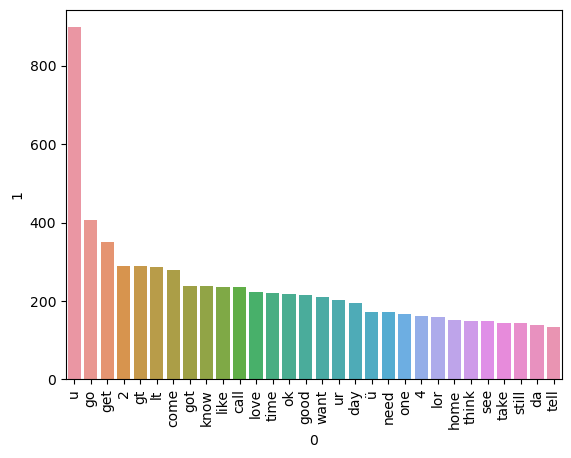

In [140]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [141]:
# Text Vectorization
# Using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

### We need to covert the text into numbers or Vectors. (Vectorize)

### 1. Bag of words
### 2. TF-IDF or Term Frequency–Inverse Document Frequency, 
### 3.  Word2Vec

In [142]:
#Bag of Words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()

tfidf = TfidfVectorizer()

In [145]:
#X = cv.fit_transform(df['transformed_text']).toarray()

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [146]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [147]:
X.shape

#(SMS , words)

(5160, 6782)

In [148]:
y = df['target'].values

In [149]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [152]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [153]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [154]:
#GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))  #precision score should be more

0.874031007751938
[[804 112]
 [ 18  98]]
0.4666666666666667


In [155]:
#MultinomialNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9641472868217055
[[916   0]
 [ 37  79]]
1.0


In [156]:
#BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9748062015503876
[[913   3]
 [ 23  93]]
0.96875


In [157]:
# Since precision score is max in mnb, so we will go with mnb
# tfidf --> MNB

In [158]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [160]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [161]:
#made dictionary
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [162]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [164]:
train_classifier(svc,X_train,y_train,X_test,y_test)

#96% accuracy

(0.9689922480620154, 0.9285714285714286)

In [165]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [167]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9689922480620154
Precision -  0.9285714285714286
For  KN
Accuracy -  0.9098837209302325
Precision -  1.0
For  NB
Accuracy -  0.9641472868217055
Precision -  1.0
For  DT
Accuracy -  0.9515503875968992
Precision -  0.8928571428571429
For  LR
Accuracy -  0.9486434108527132
Precision -  0.8795180722891566
For  RF
Accuracy -  0.9689922480620154
Precision -  0.9772727272727273
For  AdaBoost
Accuracy -  0.9612403100775194
Precision -  0.9042553191489362
For  BgC
Accuracy -  0.9709302325581395
Precision -  0.8909090909090909
For  ETC
Accuracy -  0.9757751937984496
Precision -  0.989247311827957
For  GBDT
Accuracy -  0.9554263565891473
Precision -  0.9605263157894737
For  xgb
Accuracy -  0.9709302325581395
Precision -  0.9215686274509803


In [170]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores})

In [171]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.968992,0.928571
1,KN,0.909884,1.000000
2,NB,0.964147,1.000000
3,DT,0.951550,0.892857
4,LR,0.948643,0.879518
5,RF,0.968992,0.977273
6,AdaBoost,0.961240,0.904255
7,BgC,0.970930,0.890909
8,ETC,0.975775,0.989247
9,GBDT,0.955426,0.960526


In [172]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [173]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.968992
1,KN,Accuracy,0.909884
2,NB,Accuracy,0.964147
3,DT,Accuracy,0.951550
4,LR,Accuracy,0.948643
5,RF,Accuracy,0.968992
6,AdaBoost,Accuracy,0.961240
7,BgC,Accuracy,0.970930
8,ETC,Accuracy,0.975775
9,GBDT,Accuracy,0.955426


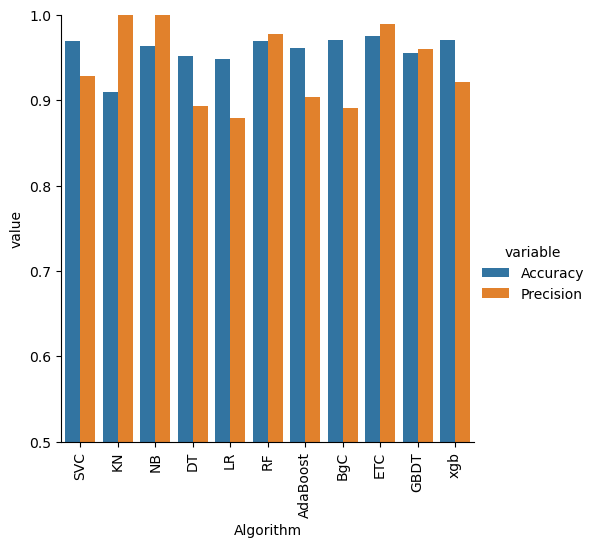

In [174]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [192]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [193]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [194]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [195]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [196]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [197]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [198]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.968992,0.928571,0.968992,0.928571,0.968992,0.928571,0.968992,0.928571
1,KN,0.909884,1.000000,0.909884,1.000000,0.909884,1.000000,0.909884,1.000000
2,NB,0.964147,1.000000,0.964147,1.000000,0.964147,1.000000,0.964147,1.000000
3,DT,0.951550,0.892857,0.951550,0.892857,0.951550,0.892857,0.951550,0.892857
4,LR,0.948643,0.879518,0.948643,0.879518,0.948643,0.879518,0.948643,0.879518
5,RF,0.968992,0.977273,0.968992,0.977273,0.968992,0.977273,0.968992,0.977273
6,AdaBoost,0.961240,0.904255,0.961240,0.904255,0.961240,0.904255,0.961240,0.904255
7,BgC,0.970930,0.890909,0.970930,0.890909,0.970930,0.890909,0.970930,0.890909
8,ETC,0.975775,0.989247,0.975775,0.989247,0.975775,0.989247,0.975775,0.989247
9,GBDT,0.955426,0.960526,0.955426,0.960526,0.955426,0.960526,0.955426,0.960526


In [199]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [200]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [201]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [202]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748062015503876
Precision 0.9787234042553191


In [205]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [206]:
from sklearn.ensemble import StackingClassifier

In [207]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


In [209]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))